# Airbnb Regression Test

In [1]:
# import the libraries

%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

__________________
## Load Data

In [2]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.81,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.50,Real Bed,strict,True,...,41.85,-87.68,Pilsen Arts Community Custom Home,Pilsen,17,97.00,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.00,1.00
1,4765892,4.94,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.00,Real Bed,strict,True,...,34.07,-118.25,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.00,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.00,1.00
2,21169968,4.94,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.00,Real Bed,moderate,True,...,40.70,-73.92,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.00,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.00,3.00
3,7939196,4.87,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.00,Real Bed,strict,True,...,40.74,-73.99,Grande Super Large APT !!!,Flatiron District,12,82.00,NaN,10010,1.00,3.00
4,18161036,3.66,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.00,Real Bed,flexible,True,...,34.05,-117.73,Private Cozy and Clean Rooms in Pomona,NaN,2,100.00,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.00,1.00


In [4]:
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.00,Real Bed,flexible,False,NYC,...,40.83,-73.95,En suite room Upper West Side,Hamilton Heights,1,100.00,https://a0.muscache.com/im/pictures/90125799/6...,10031,1.00,1.00
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.50,Real Bed,moderate,True,DC,...,38.92,-77.03,Cozy or King BR in a grand victorian,Columbia Heights,146,96.00,https://a0.muscache.com/im/pictures/64128167/5...,20009,1.00,2.00
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.00,Real Bed,flexible,True,NYC,...,40.67,-73.95,COMFORTABLE & COZY-2 STOPS BARCLAY,Crown Heights,10,92.00,https://a0.muscache.com/im/pictures/56585377/e...,11225.0,1.00,1.00
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.00,Real Bed,flexible,False,NYC,...,40.67,-73.95,Sunny & Colorful Private BR in Crown Heights,Crown Heights,0,nan,https://a0.muscache.com/im/pictures/d76d0e9a-e...,11225.0,1.00,1.00
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.00,Real Bed,strict,True,NYC,...,40.74,-73.91,Lovely & Cozy Apartment in Queens!,Woodside,45,93.00,https://a0.muscache.com/im/pictures/435d8af0-f...,11377,2.00,3.00


_________________________
# Data Cleaning

## Change Format

### 1. True & False

In [5]:
# Handel True and False values

def change_tf_format(df_airbnb):
    
    df_airbnb=df_airbnb.replace(to_replace='t', value=True)
    df_airbnb=df_airbnb.replace(to_replace='f', value=False)
    

### 2. Dates

In [6]:
# Date Columns

import time
import datetime

def format_date(date_string):

    if pd.isnull(date_string):
        return np.nan
    
    if type(date_string) != str:
        return date_string
    
    date_timestamp = time.mktime(datetime.datetime.strptime(date_string, "%m/%d/%Y").timetuple())    
    return date_timestamp

### 3. Clean & Split Amenities

In [7]:
# amenities
# Reference: https://www.kaggle.com/naamaavi/airbnb-price-prediction-regression-project

def clean_split_string(s):
    
    for c in ['"','{','}','[',']']:
        if (c in s):
            s = s.replace(c,'')
        
    for c in ['/',':',' ','-','.','&',')','(','\'','/']:
        if (c in s):
            s = s.replace(c,'_')
     
    if (',' not in s):
        return [s] #single amenity as a list
    
    return s.split(',') #return list of amenities

In [8]:
def clean_data(df_airbnb):
    
    # True & False
    change_tf_format(df_airbnb)
    
    # Dates
    df_airbnb['first_review'] = df_airbnb['first_review'].apply(format_date)
    df_airbnb['last_review'] = df_airbnb['last_review'].apply(format_date)
    df_airbnb['host_since'] = df_airbnb['host_since'].apply(format_date)
        

## Missing Values

In [9]:
print("Train Data:\n" , df.isnull().sum())
print('')
print("Test Data:\n" , df_test.isnull().sum())

Train Data:
 id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
thumbnail_url              5629
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64

Test Data:
 id                           0
pr

### 1. Review scores rating

In [10]:
def mv_review_scores(df_airbnb):
    
    # Group by Highest Correlation Column
    reviews_mean_rsr = df_airbnb.groupby('number_of_reviews')['review_scores_rating'].mean()
    
    # Fill the missing values
    for idx in df_airbnb.index[df_airbnb['review_scores_rating'].isnull()]:
        n_reviews = df_airbnb.loc[idx,'review_scores_rating']

        if n_reviews == 0: # most of the missing values are because there aren't any reviews to calculate the rate from.
            df_airbnb.at[idx,'review_scores_rating'] = 0

        elif n_reviews > 0:
            df_airbnb.at[idx,'review_scores_rating'] = reviews_mean_rsr.iloc[int(n_reviews)]

        else: #If it's null
            df_airbnb.at[idx,'review_scores_rating'] = df_airbnb['review_scores_rating'].mean()

### 2. Bedrooms

In [11]:
#Bedrooms

def mv_bedrooms(df_airbnb):
    
    acc_med_bedrooms = df_airbnb.groupby('accommodates', sort=False)['bedrooms'].median()
    
    for idx in df_airbnb.index[df_airbnb['bedrooms'].isnull()]:
        n_acc = df_airbnb.loc[idx,'accommodates']

        if n_acc > 0:
            df_airbnb.at[idx,'bedrooms'] = acc_med_bedrooms.iloc[int(n_acc)]

        else: # If 'accommodates' is null
            df_airbnb.at[idx,'bedrooms'] = df_airbnb['bedrooms'].median()


### 3. Bathrooms

In [12]:
#Bathrooms

import math

def mv_bathrooms(df_airbnb):
    
    bedrooms_med_baths = df_airbnb.groupby('bedrooms', sort=False)['bathrooms'].median()
    
    for idx in df_airbnb.index[df_airbnb['bathrooms'].isnull()]:
        n_bedrms = df_airbnb.loc[idx,'bedrooms']

        #if(n_bedrms > 0): #replace by the median number of bathrooms
        df_airbnb.at[idx,'bathrooms'] = bedrooms_med_baths.iloc[int(n_bedrms)]

        #else: #replace by the median bathroom
            #df_airbnb.at[idx,'bathrooms'] = df_airbnb['bathrooms'].median()


### 4. Beds

In [13]:
def mv_beds(df_airbnb):
    
    #acc_med_beds = df_airbnb.groupby('accommodates', sort=False)['beds'].median()
    df_airbnb['beds'] = df_airbnb['beds'].fillna(int(df_airbnb['beds'].mean()))


In [14]:
def fill_missing_values(df_airbnb):
    
    mv_review_scores(df_airbnb)
    mv_bedrooms(df_airbnb)
    mv_bathrooms(df_airbnb)
    mv_beds(df_airbnb)
    

_________________________________
## Feature Engineering

In [15]:
# Amenities:

def get_amenities(df_airbnb):
    
    unique_amenities = []

    for idx, a_list in enumerate(df_airbnb['amenities']):        
        for a in a_list:
            if (a not in df_airbnb.columns):
                unique_amenities += [a]
                df_airbnb[a] = 0
            
            df_airbnb.at[idx, a] = 1
            
    return unique_amenities

In [16]:
# Dummies for categorical columns

def get_dum(df1, df2):
    
    categorical=['room_type','bed_type','cancellation_policy', 'city']
    df_dummies=pd.get_dummies(df1[categorical])
    
    # Get dummies of property_type, as it's different in each DF.
    
    property_type_dummies = pd.get_dummies(df1['property_type'])
    common_properties = list(set(df1['property_type'].unique()) & set(df2['property_type'].unique()))
    property_type_dummies = property_type_dummies[common_properties]
    
    all_df_dummies = pd.concat([df_dummies, property_type_dummies], axis =1)    
    new_df = pd.concat([df1, all_df_dummies], axis=1)

    return new_df, all_df_dummies

________________________
## Apply Changes

In [17]:
# For training data

#clean_data(df)
df['amenities'] = df['amenities'].apply(clean_split_string)
fill_missing_values(df)
unique_am = get_amenities(df)
len(unique_am)

126

In [18]:
# For testing data

#clean_data(df_test)
fill_missing_values(df_test)
df_test['amenities'] = df_test['amenities'].apply(clean_split_string)
test_unique_am = get_amenities(df_test)
len(test_unique_am)

129

In [19]:

df, df_dum = get_dum(df, df_test)
df_test, df_dummies_test = get_dum(df_test,df)

print(df_dum.shape, '---', df_dummies_test.shape)

(51000, 48) --- (23111, 48)


_______________
## Overview

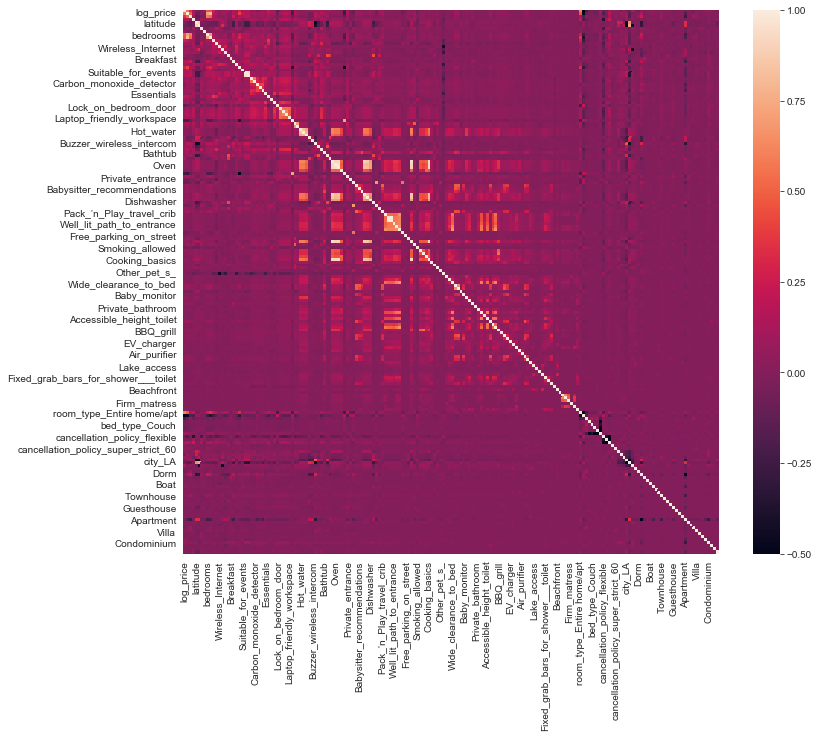

,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,Camper/RV,Hostel,Villa,Cabin,Chalet,Other,Condominium,Boutique hotel,Treehouse,Bungalow
room_type_Private room,-0.53,-0.45,-0.15,-0.18,0.06,0.06,-0.01,-0.02,-0.23,-0.36,...,-0.01,-0.00,0.01,-0.02,-0.01,-0.01,-0.02,0.02,0.00,-0.04
translation_missing__en_hosting_amenity_49,-0.23,-0.26,-0.09,0.00,-0.00,0.00,0.03,0.04,-0.17,-0.20,...,0.00,0.03,-0.01,0.01,-0.00,-0.00,0.01,-0.01,0.00,-0.00
room_type_Shared room,-0.22,-0.09,0.03,-0.09,-0.05,-0.03,-0.04,-0.04,-0.05,-0.00,...,0.00,0.11,-0.00,0.00,-0.00,0.01,-0.01,-0.01,-0.00,-0.01
translation_missing__en_hosting_amenity_50,-0.21,-0.21,-0.09,0.03,-0.01,-0.00,0.05,0.05,-0.16,-0.17,...,0.00,0.03,-0.01,0.00,0.00,-0.00,0.00,-0.01,0.01,-0.01
Lock_on_bedroom_door,-0.13,-0.07,-0.00,-0.02,0.03,0.03,-0.08,0.02,-0.04,-0.05,...,-0.01,0.02,0.01,-0.01,-0.00,0.01,0.04,0.05,-0.00,-0.01
Pets_live_on_this_property,-0.10,-0.08,-0.03,0.01,-0.09,-0.09,0.09,0.05,-0.04,-0.07,...,0.01,-0.01,-0.01,0.02,0.01,-0.00,-0.00,-0.01,0.00,0.02
cancellation_policy_flexible,-0.10,-0.17,-0.06,-0.36,-0.01,0.01,-0.22,-0.00,-0.09,-0.14,...,0.01,-0.01,-0.01,0.00,-0.00,0.00,-0.01,0.02,0.00,-0.01
city_NYC,-0.08,-0.14,-0.16,-0.06,0.65,0.75,-0.07,-0.06,-0.11,-0.10,...,-0.03,-0.01,-0.03,-0.03,-0.01,-0.02,-0.11,-0.01,-0.01,-0.05
Cat_s_,-0.07,-0.06,-0.02,-0.01,-0.02,-0.03,0.06,0.02,-0.02,-0.05,...,0.01,-0.01,-0.01,0.02,-0.00,-0.01,0.00,-0.01,0.01,0.01
Smoking_allowed,-0.07,-0.03,-0.00,-0.05,-0.07,-0.05,-0.01,-0.03,-0.02,-0.03,...,0.02,-0.00,0.00,0.01,0.01,0.00,-0.01,-0.01,0.01,0.00


In [127]:
corr_matrix = df.iloc[:,1:].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-0.5)
plt.show()

corr_matrix.sort_values(by='log_price')

______________________________
## Train Data

In [193]:
#X_columns = ['bathrooms', 'accommodates','number_of_reviews'] + list(df_dum.columns)

X_columns = ['room_type_Entire home/apt', 'bathrooms', 'accommodates','beds','number_of_reviews','city_SF', 'city_LA',
             'Elevator','room_type_Shared room' ,'city_DC','Cable_TV','city_Chicago','TV','Indoor_fireplace',
             'room_type_Private room','Doorman','Family_kid_friendly','Private_entrance','longitude','latitude',
             'Smoking_allowed','Free_parking_on_street','Breakfast','Dryer','Washer','cancellation_policy_strict',
             'Suitable_for_events','Hair_dryer','Kitchen','Heating','bed_type_Real Bed','24_hour_check_in','cleaning_fee']

In [194]:
#common_amenities = list(set(unique_am) & set(test_unique_am))

#X_columns += common_amenities
y_column = ['log_price']

In [202]:
df_train = df[X_columns + y_column]

X_train = df_train[X_columns]
y_train = df_train[y_column]

X_train.columns

Index(['room_type_Entire home/apt', 'bathrooms', 'accommodates', 'beds',
       'number_of_reviews', 'city_SF', 'city_LA', 'Elevator',
       'room_type_Shared room', 'city_DC', 'Cable_TV', 'city_Chicago', 'TV',
       'Indoor_fireplace', 'room_type_Private room', 'Doorman',
       'Family_kid_friendly', 'Private_entrance', 'longitude', 'latitude',
       'Smoking_allowed', 'Free_parking_on_street', 'Breakfast', 'Dryer',
       'Washer', 'cancellation_policy_strict', 'Suitable_for_events',
       'Hair_dryer', 'Kitchen', 'Heating', 'bed_type_Real Bed',
       '24_hour_check_in', 'cleaning_fee'],
      dtype='object')

______________
## Split, Fit & Predict for Submission

In [203]:
X_test = df_test[X_columns]
print(X_test.columns)

Index(['room_type_Entire home/apt', 'bathrooms', 'accommodates', 'beds',
       'number_of_reviews', 'city_SF', 'city_LA', 'Elevator',
       'room_type_Shared room', 'city_DC', 'Cable_TV', 'city_Chicago', 'TV',
       'Indoor_fireplace', 'room_type_Private room', 'Doorman',
       'Family_kid_friendly', 'Private_entrance', 'longitude', 'latitude',
       'Smoking_allowed', 'Free_parking_on_street', 'Breakfast', 'Dryer',
       'Washer', 'cancellation_policy_strict', 'Suitable_for_events',
       'Hair_dryer', 'Kitchen', 'Heating', 'bed_type_Real Bed',
       '24_hour_check_in', 'cleaning_fee'],
      dtype='object')


In [ ]:
# Gradient Boosting

# Random Forest

rf_model = RandomForestRegressor(100)
rf_model.fit(X_train, y_train)
df_test['log_price'] = rf_model.predict(X_test)

# Gradient Boosting

#gb_model = GradientBoostingRegressor()
#gb_model.fit(X_train, y_train)
#df_test['log_price'] = gb_model.predict(X_test)

df_test[['id', 'log_price']].to_csv('submission_v9.csv', index=False)

C:\Users\A-Sha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


______________
## Split, Fit and Predict for Training

In [196]:
# Split

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True, random_state=10)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 33)
y_train (40800, 1)
X_test (10200, 33)
y_test (10200, 1)


In [197]:
# Random Forest

rf_model = RandomForestRegressor(100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


C:\Users\A-Sha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RMSE 0.4009067969892112


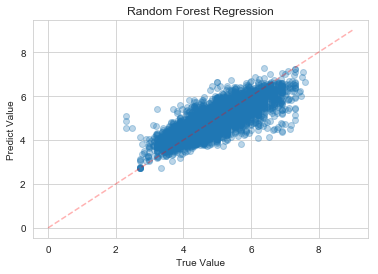

In [198]:
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('RMSE', rmse)
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Random Forest Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [199]:
# Gradient Boosting

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)


C:\Users\A-Sha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE 0.41023180411917315


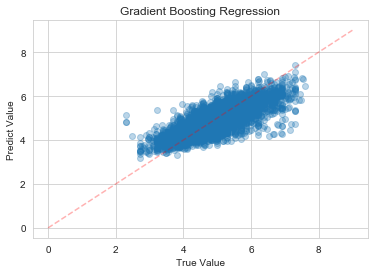

In [200]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
print('RMSE', rmse)
plt.scatter(y_test, gb_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Gradient Boosting Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [201]:

model = rf_model
fi = []

for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
    
pd.DataFrame(fi).sort_values(1, ascending=False)

,0,1
0,room_type_Entire home/apt,0.36
18,longitude,0.15
19,latitude,0.13
1,bathrooms,0.12
4,number_of_reviews,0.05
2,accommodates,0.05
3,beds,0.01
10,Cable_TV,0.01
32,cleaning_fee,0.01
12,TV,0.01
